In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('zg')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/111.root"]
a = getData(files)


Processed $HOME/EIC/output/111.root in 67.3 seconds


In [4]:
# general cuts
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')

pt_electron > 4 959634  fraction kept: 3.2
pt_jet > 4 190580  fraction kept: 19.9
0.1 < y < 0.85 121616  fraction kept: 63.8
W2 > 4 121616  fraction kept: 100.0


In [5]:
e = fixPhi(d, 'photon')

Fixed photon phi range
Fixed photon delta phi range


In [6]:
e.eval('nu = 0.533*Q2/x',inplace=True)

In [7]:
def plot(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        plt.hist(df_array[i]['delta_phi_photon_abs'], label='$ '+ label_array[i] + ' GeV$', range=(0,3.5), bins=350, histtype='step', fill=False, stacked=True, normed=True, color=color_array[i], linewidth=2)

In [10]:
e1 = applyCut(e, '5 < pt_electron < 10', '5 < pt_electron < 10')
e2 = applyCut(e, '10 < pt_electron < 20', '10 < pt_electron < 20')

 5 < pt_electron < 10 78002  fraction kept: 64.1
10 < pt_electron < 20 5936  fraction kept: 4.9


In [11]:
print np.mean(keepOneJet(e1)['x']), np.mean(keepOneJet(e2)['x'])


Remove extra jets 76648  fraction kept: 98.3
0.14130227 
Remove extra jets 5881  fraction kept: 99.1
0.3587229


In [12]:
print np.mean(keepOneJet(e1)['Q2']), np.mean(keepOneJet(e2)['Q2'])


Remove extra jets 76648  fraction kept: 98.3
67.55466 
Remove extra jets 5881  fraction kept: 99.1
226.32814


In [13]:
print np.mean(keepOneJet(e1)['nu']), np.mean(keepOneJet(e2)['nu'])


Remove extra jets 76648  fraction kept: 98.3
291.67136 
Remove extra jets 5881  fraction kept: 99.1
360.1543


In [14]:
def plot_dphi(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        fig = plt.hist(df_array[i]['delta_phi_photon_abs'], label=label_array[i], range=(0,0.5), bins=25, histtype='step', fill=True, alpha=0.5, stacked=True, normed=True, color=color_array[i], linewidth=2)
    return fig

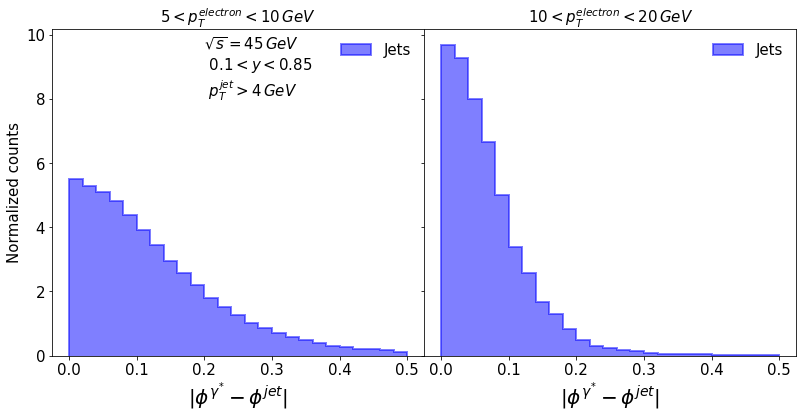

In [16]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_dphi([e1], ['Jets'], ['b'])
plt.xlabel('$|\phi^{\gamma^{*}}-\phi^{jet}|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.2,8, '$\sqrt{s} = 45 \, GeV$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, GeV$', fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 \, GeV$', fontsize=15)

ax2 = plt.subplot(132, sharey=ax1)
plot_dphi([e2], ['Jets'], ['b'])
plt.xlabel('$|\phi^{\gamma^{*}}-\phi^{jet}|$', fontsize=20)
plt.xticks(fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.title('$10 < p_T^{electron} < 20 \, GeV$', fontsize=15)

plt.savefig('images/dphi_2.pdf', bbox_inches='tight')